Reading from directories and preprocessing stage

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [87]:
!ls "/content/drive/My Drive/"

'Colab Notebooks'   digits  'Machine vision-Paper'   names   tumor_classification_other


In [39]:
image_directory  = "/content/drive/My Drive/tumor_classification_other"

In [40]:
classes = !ls "/content/drive/My Drive/tumor_classification_other"
print(classes[0])

glioma	meningioma  pituitary


In [41]:
#create classes ------
classes = classes[0].split()
print(classes)

['glioma', 'meningioma', 'pituitary']


In [42]:
glioma = !ls "/content/drive/My Drive/tumor_classification_other/glioma"
meningioma = !ls "/content/drive/My Drive/tumor_classification_other/meningioma"
pituitary = !ls "/content/drive/My Drive/tumor_classification_other/pituitary"

In [43]:
print(pituitary)

['pituitary_0.jpg     pituitary_1263.jpg\tpituitary_214.jpg  pituitary_478.jpg  pituitary_740.jpg', 'pituitary_1000.jpg  pituitary_1264.jpg\tpituitary_215.jpg  pituitary_479.jpg  pituitary_741.jpg', 'pituitary_1001.jpg  pituitary_1265.jpg\tpituitary_216.jpg  pituitary_47.jpg   pituitary_742.jpg', 'pituitary_1002.jpg  pituitary_1266.jpg\tpituitary_217.jpg  pituitary_480.jpg  pituitary_743.jpg', 'pituitary_1003.jpg  pituitary_1267.jpg\tpituitary_218.jpg  pituitary_481.jpg  pituitary_744.jpg', 'pituitary_1004.jpg  pituitary_1268.jpg\tpituitary_219.jpg  pituitary_482.jpg  pituitary_745.jpg', 'pituitary_1005.jpg  pituitary_1269.jpg\tpituitary_21.jpg   pituitary_483.jpg  pituitary_746.jpg', 'pituitary_1006.jpg  pituitary_126.jpg\tpituitary_220.jpg  pituitary_484.jpg  pituitary_747.jpg', 'pituitary_1007.jpg  pituitary_1270.jpg\tpituitary_221.jpg  pituitary_485.jpg  pituitary_748.jpg', 'pituitary_1008.jpg  pituitary_1271.jpg\tpituitary_222.jpg  pituitary_486.jpg  pituitary_749.jpg', 'pituitary

In [44]:
contents = []
directory_contents = {}
#glioma
for content in glioma:
  c = content.split()
  contents.extend(c)
directory_contents['glioma'] = contents
contents = []

#meningioma
for content in meningioma:
  c = content.split()
  contents.extend(c)
directory_contents['meningioma'] = contents
contents = []

#glioma
for content in pituitary:
  c = content.split()
  contents.extend(c)
directory_contents['pituitary'] = contents
contents = []

In [45]:
print(len(directory_contents['pituitary']))
print(len(directory_contents['glioma']))
print(len(directory_contents['meningioma']))

1457
1321
1339


##Presenting the MRI images

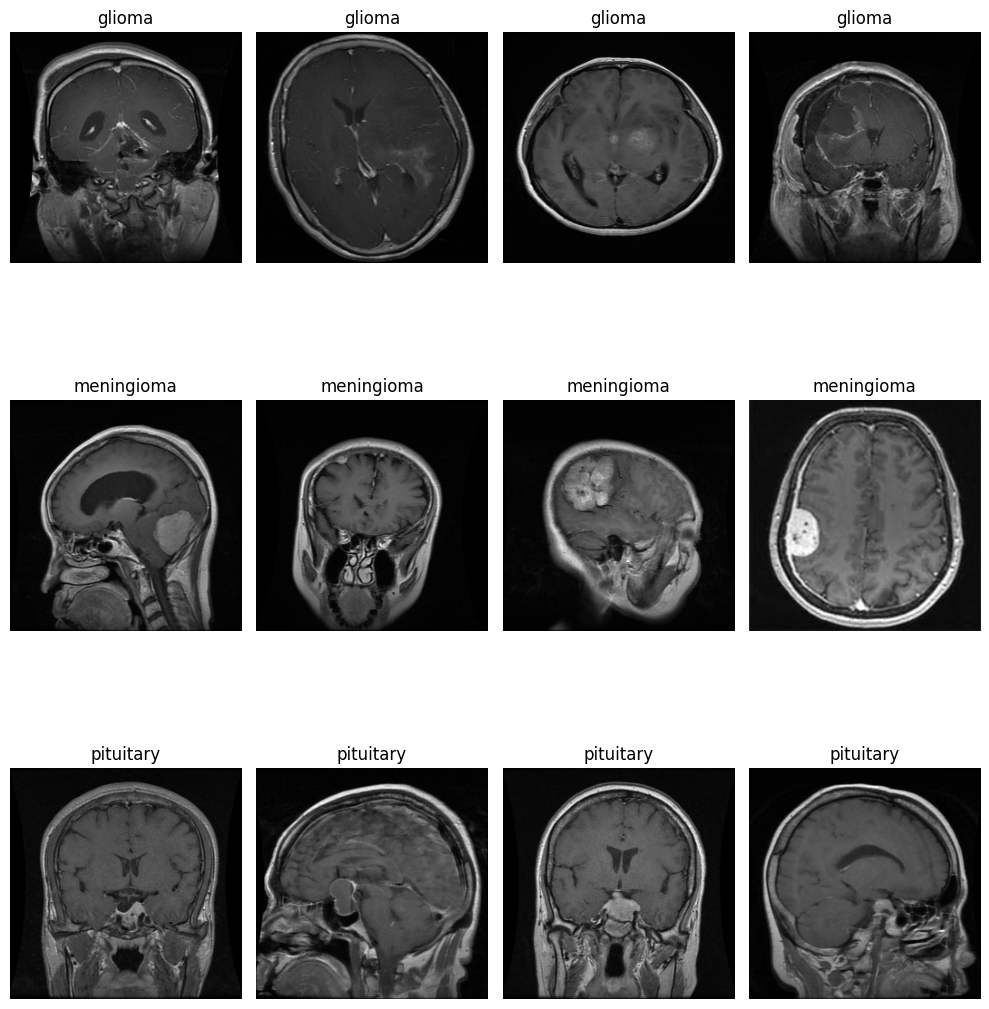

In [46]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(3, 4, figsize=(10, 12))
for c in classes:
  random.shuffle(directory_contents[c])
  photos = directory_contents[c][:4]
  for i in range (4):
    path =  image_directory + "/" + c + "/" + photos[i]
    image = mpimg.imread(path)
    if c == "glioma":
      axs[0,i].imshow(image, cmap='gray')
      axs[0,i].axis('off')
      axs[0,i].set_title(c)
    if c == "meningioma":
      axs[1,i].imshow(image, cmap='gray')
      axs[1,i].axis('off')
      axs[1,i].set_title(c)
    if c == "pituitary":
      axs[2,i].imshow(image, cmap='gray')
      axs[2,i].axis('off')
      axs[2,i].set_title(c)
plt.tight_layout()
plt.show()


##Creating test and train directories and data for the model

In [47]:
import os
import random
import shutil
output_dir = "/content/tumor_dataset_for_model"

# Create train and test directories
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

for class_name in classes:
    # List images
    class_path = os.path.join(image_directory, class_name)
    images = os.listdir(class_path)

    # Shuffle and select 700 images
    random.shuffle(images)
    selected_images = images[:700]

    # Split into train (500) and test (200)
    train_images = selected_images[:500]
    test_images = selected_images[500:]

    # Copy files to train/test directories
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

In [48]:
x = !ls "/content/tumor_dataset_for_model/train/glioma"

print(x)

['glioma_1001.jpg  glioma_1177.jpg  glioma_193.jpg  glioma_406.jpg  glioma_5.jpg\t  glioma_810.jpg', 'glioma_1003.jpg  glioma_1179.jpg  glioma_196.jpg  glioma_40.jpg   glioma_601.jpg  glioma_812.jpg', 'glioma_1006.jpg  glioma_117.jpg   glioma_199.jpg  glioma_411.jpg  glioma_602.jpg  glioma_814.jpg', 'glioma_1008.jpg  glioma_1181.jpg  glioma_1.jpg\t  glioma_413.jpg  glioma_603.jpg  glioma_815.jpg', 'glioma_1011.jpg  glioma_1182.jpg  glioma_201.jpg  glioma_414.jpg  glioma_604.jpg  glioma_816.jpg', 'glioma_1013.jpg  glioma_1183.jpg  glioma_202.jpg  glioma_415.jpg  glioma_606.jpg  glioma_817.jpg', 'glioma_1014.jpg  glioma_1184.jpg  glioma_204.jpg  glioma_419.jpg  glioma_607.jpg  glioma_818.jpg', 'glioma_1015.jpg  glioma_1185.jpg  glioma_211.jpg  glioma_422.jpg  glioma_608.jpg  glioma_819.jpg', 'glioma_1017.jpg  glioma_1188.jpg  glioma_213.jpg  glioma_423.jpg  glioma_609.jpg  glioma_821.jpg', 'glioma_1019.jpg  glioma_1191.jpg  glioma_215.jpg  glioma_424.jpg  glioma_60.jpg   glioma_822.jpg',

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

train_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64,64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    shuffle = False,
    target_size = (64,64),
    batch_size=32,
    class_mode='categorical'
)


Found 2122 images belonging to 3 classes.
Found 921 images belonging to 3 classes.


##Building up the deep learning models

In [52]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,969,283 (7.51 MB)

 Trainable params: 1,969,283 (7.51 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,811 (1.57 MB)

 Trainable params: 411,811 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,379 (364.76 KB)

 Trainable params: 93,379 (364.76 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,973,443 (7.53 MB)

 Trainable params: 1,973,443 (7.53 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,977,603 (7.54 MB)

 Trainable params: 1,977,603 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model6 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 841,795 (3.21 MB)

 Trainable params: 841,795 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model7 = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 62, 62, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 29, 29, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,757,059 (6.70 MB)

 Trainable params: 1,757,059 (6.70 MB)

 Non-trainable params: 0 (0.00 B)

##Training the model

In [59]:
# Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
# Callbacks
early_stopping1 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint1 = ModelCheckpoint('model1.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

In [61]:
history = model1.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping1, model_checkpoint1]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4989 - loss: 1.0088
Epoch 1: val_loss improved from inf to 0.58743, saving model to model1.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.5004 - loss: 1.0065 - val_accuracy: 0.7687 - val_loss: 0.5874
Epoch 2/10
60/67 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8090 - loss: 0.5132
Epoch 2: val_loss improved from 0.58743 to 0.43852, saving model to model1.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.8077 - loss: 0.5124 - val_accuracy: 0.8165 - val_loss: 0.4385
Epoch 3/10
60/67 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8896 - loss: 0.3342
Epoch 3: val_loss improved from 0.43852 to 0.38122, saving model to model1.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8868 - loss: 0.3369 - val_accuracy: 0.8545 - val_loss: 0.3812
Epoch 4/10
66/67 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9254 - loss: 0.2219
Epoch 4: val_loss improved from 0.38122 to 0.35946, saving model to model1.keras
67

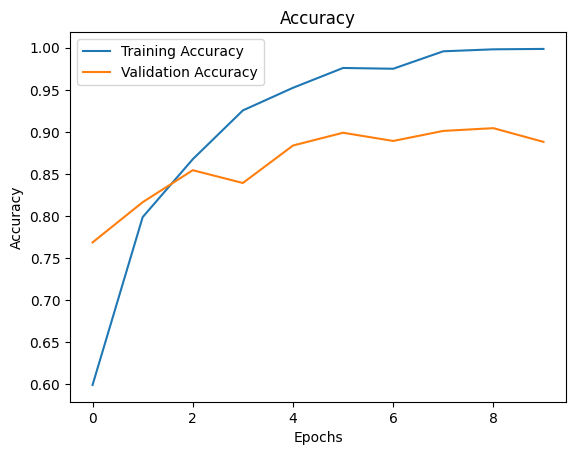

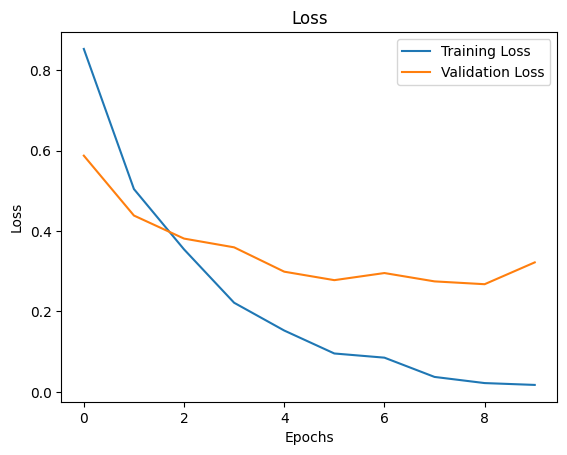

In [62]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model1.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9052 - loss: 0.2395
Test Accuracy: 0.90, Test Loss: 0.27


In [64]:
# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
# Callbacks
early_stopping2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint2 = ModelCheckpoint('model2.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

In [66]:
history = model2.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping2, model_checkpoint2]
)

Epoch 1/10
60/67 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4698 - loss: 0.9693
Epoch 1: val_loss improved from inf to 0.65673, saving model to model2.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.4816 - loss: 0.9551 - val_accuracy: 0.7296 - val_loss: 0.6567
Epoch 2/10
60/67 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7271 - loss: 0.6101
Epoch 2: val_loss improved from 0.65673 to 0.52409, saving model to model2.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7303 - loss: 0.6070 - val_accuracy: 0.7850 - val_loss: 0.5241
Epoch 3/10
66/67 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8279 - loss: 0.4480
Epoch 3: val_loss improved from 0.52409 to 0.42962, saving model to model2.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8282 - loss: 0.4476 - val_accuracy: 0.8143 - val_loss: 0.4296
Epoch 4/10
66/67 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8645 - loss: 0.3498
Epoch 4: val_loss improved from 0.42962 to 0.42313, saving model to model

In [67]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model2.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8906 - loss: 0.2592
Test Accuracy: 0.87, Test Loss: 0.33


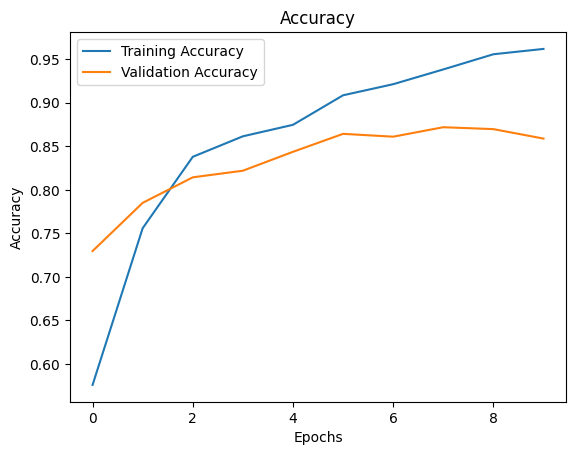

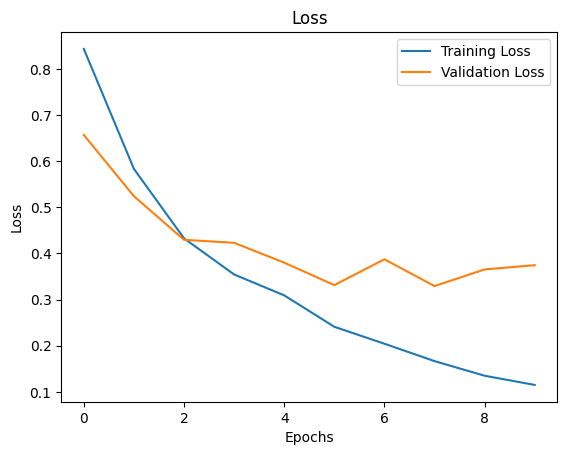

In [68]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [69]:
# Compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping3 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint3 = ModelCheckpoint('model3.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history3 = model3.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping3, model_checkpoint3]
)


Epoch 1/10
61/67 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4213 - loss: 1.0279
Epoch 1: val_loss improved from inf to 0.77033, saving model to model3.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.4289 - loss: 1.0190 - val_accuracy: 0.6493 - val_loss: 0.7703
Epoch 2/10
60/67 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6837 - loss: 0.7068
Epoch 2: val_loss improved from 0.77033 to 0.58428, saving model to model3.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6863 - loss: 0.7018 - val_accuracy: 0.7557 - val_loss: 0.5843
Epoch 3/10
65/67 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7874 - loss: 0.5276
Epoch 3: val_loss improved from 0.58428 to 0.49842, saving model to model3.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.7874 - loss: 0.5275 - val_accuracy: 0.7861 - val_loss: 0.4984
Epoch 4/10
62/67 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8250 - loss: 0.4516
Epoch 4: val_loss improved from 0.49842 to 0.46869, saving model to model

In [70]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model3.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8879 - loss: 0.3124
Test Accuracy: 0.90, Test Loss: 0.28


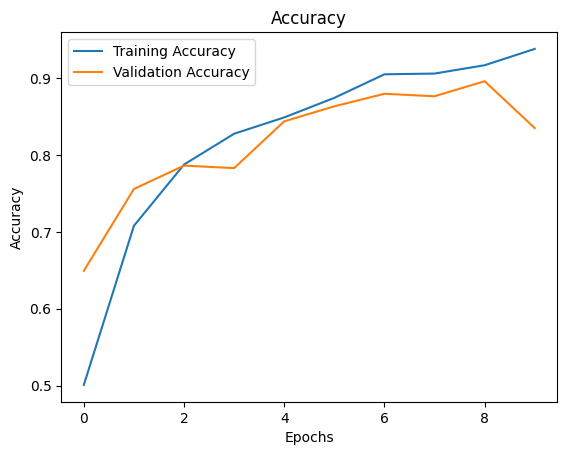

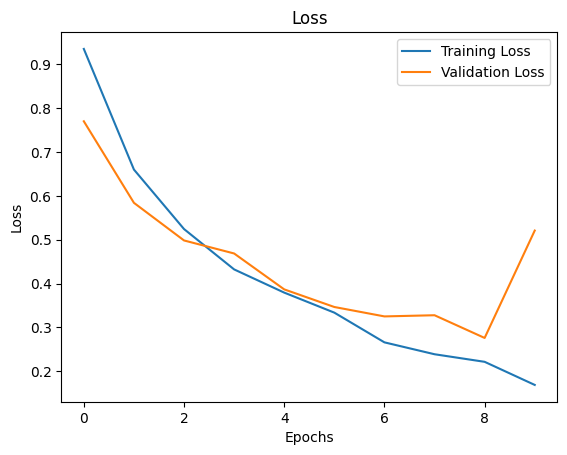

In [71]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
# Compile the model
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping4 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint4 = ModelCheckpoint('model4.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history4 = model4.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping4, model_checkpoint4]
)


Epoch 1/10
60/67 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5097 - loss: 0.9782
Epoch 1: val_loss improved from inf to 0.63329, saving model to model4.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.5201 - loss: 0.9603 - val_accuracy: 0.7296 - val_loss: 0.6333
Epoch 2/10
64/67 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7959 - loss: 0.5201
Epoch 2: val_loss improved from 0.63329 to 0.49924, saving model to model4.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7963 - loss: 0.5180 - val_accuracy: 0.7774 - val_loss: 0.4992
Epoch 3/10
60/67 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8639 - loss: 0.3409
Epoch 3: val_loss improved from 0.49924 to 0.39112, saving model to model4.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8648 - loss: 0.3385 - val_accuracy: 0.8480 - val_loss: 0.3911
Epoch 4/10
60/67 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9179 - loss: 0.2234
Epoch 4: val_loss improved from 0.39112 to 0.33591, saving model to model

In [73]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model4.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8896 - loss: 0.2622
Test Accuracy: 0.90, Test Loss: 0.28


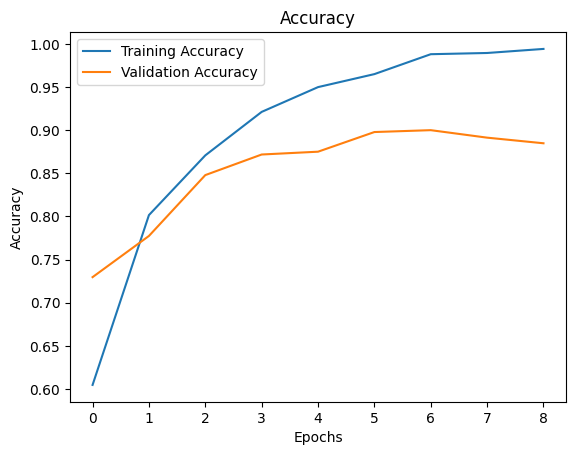

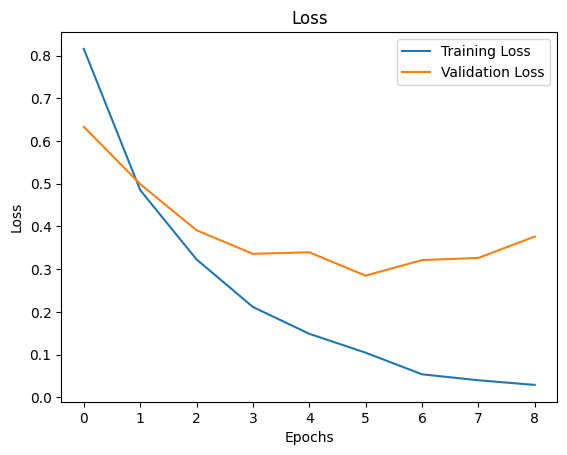

In [74]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
# Compile the model
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping5 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint5 = ModelCheckpoint('model5.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history5 = model5.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping5, model_checkpoint5]
)

Epoch 1/10
60/67 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5197 - loss: 0.9693
Epoch 1: val_loss improved from inf to 0.77132, saving model to model5.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.5300 - loss: 0.9518 - val_accuracy: 0.6645 - val_loss: 0.7713
Epoch 2/10
60/67 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7815 - loss: 0.5413
Epoch 2: val_loss improved from 0.77132 to 0.52056, saving model to model5.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7829 - loss: 0.5358 - val_accuracy: 0.7872 - val_loss: 0.5206
Epoch 3/10
64/67 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8575 - loss: 0.3235
Epoch 3: val_loss improved from 0.52056 to 0.43260, saving model to model5.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8579 - loss: 0.3233 - val_accuracy: 0.8339 - val_loss: 0.4326
Epoch 4/10
60/67 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9115 - loss: 0.2318
Epoch 4: val_loss improved from 0.43260 to 0.29808, saving model to model

In [76]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model5.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9086 - loss: 0.2665
Test Accuracy: 0.91, Test Loss: 0.28


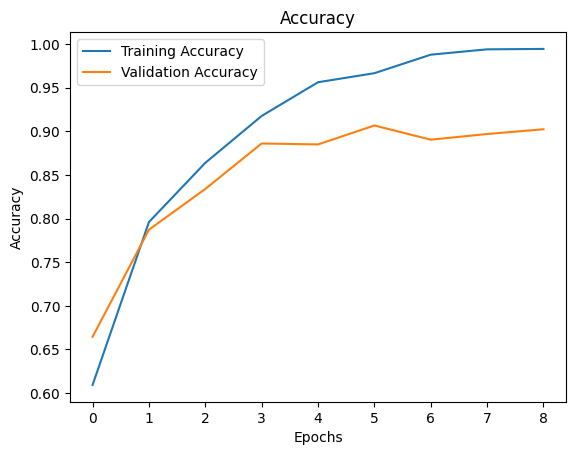

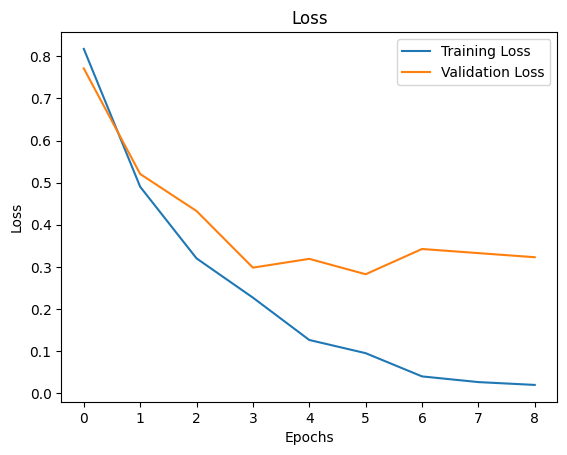

In [77]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [78]:
# Compile the model
model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping6 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint6 = ModelCheckpoint('model6.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history6 = model6.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping6, model_checkpoint6]
)

Epoch 1/10
61/67 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4896 - loss: 0.9362
Epoch 1: val_loss improved from inf to 0.60629, saving model to model6.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.5013 - loss: 0.9237 - val_accuracy: 0.7524 - val_loss: 0.6063
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7768 - loss: 0.5446
Epoch 2: val_loss improved from 0.60629 to 0.46719, saving model to model6.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7770 - loss: 0.5440 - val_accuracy: 0.8089 - val_loss: 0.4672
Epoch 3/10
60/67 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8371 - loss: 0.3942
Epoch 3: val_loss improved from 0.46719 to 0.44106, saving model to model6.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.8378 - loss: 0.3943 - val_accuracy: 0.8230 - val_loss: 0.4411
Epoch 4/10
63/67 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8596 - loss: 0.3570
Epoch 4: val_loss improved from 0.44106 to 0.41016, saving model to model

In [79]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model6.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8932 - loss: 0.2666
Test Accuracy: 0.88, Test Loss: 0.31


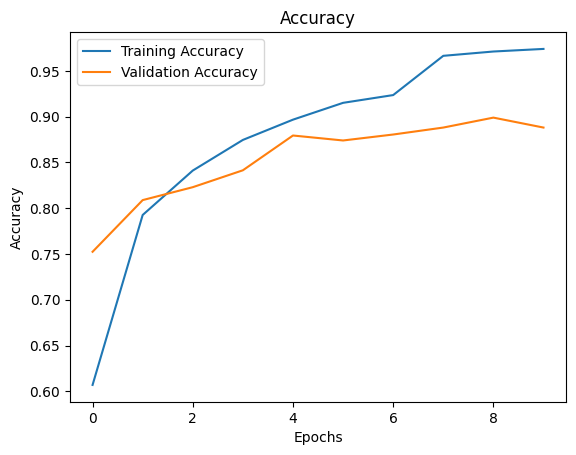

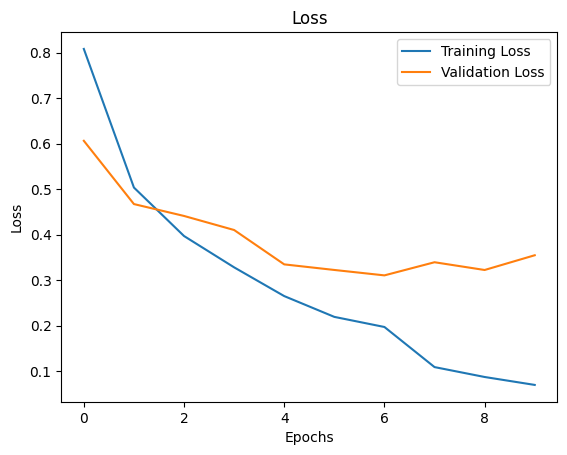

In [80]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [81]:
# Compile the model
model7.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping7 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint7 = ModelCheckpoint('model7.keras', monitor='val_loss', save_best_only=True, mode="auto", verbose=1)

history6 = model7.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping7, model_checkpoint7]
)

Epoch 1/10
63/67 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4408 - loss: 0.9979
Epoch 1: val_loss improved from inf to 0.72663, saving model to model7.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.4489 - loss: 0.9895 - val_accuracy: 0.6732 - val_loss: 0.7266
Epoch 2/10
65/67 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7299 - loss: 0.6218
Epoch 2: val_loss improved from 0.72663 to 0.46889, saving model to model7.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.7316 - loss: 0.6186 - val_accuracy: 0.8208 - val_loss: 0.4689
Epoch 3/10
64/67 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8248 - loss: 0.4450
Epoch 3: val_loss did not improve from 0.46889
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.8247 - loss: 0.4456 - val_accuracy: 0.7633 - val_loss: 0.5338
Epoch 4/10
64/67 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8344 - loss: 0.4049
Epoch 4: val_loss improved from 0.46889 to 0.42437, saving model to model7.keras
67/67 ━━━━━━━━━━━━━━━━━━━━

In [82]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('model7.keras')

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8935 - loss: 0.3456
Test Accuracy: 0.91, Test Loss: 0.31


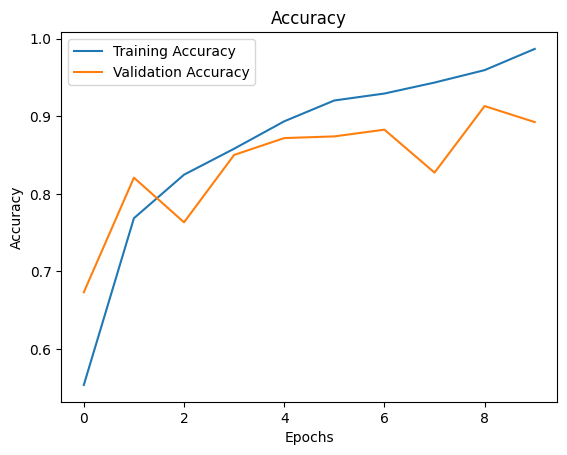

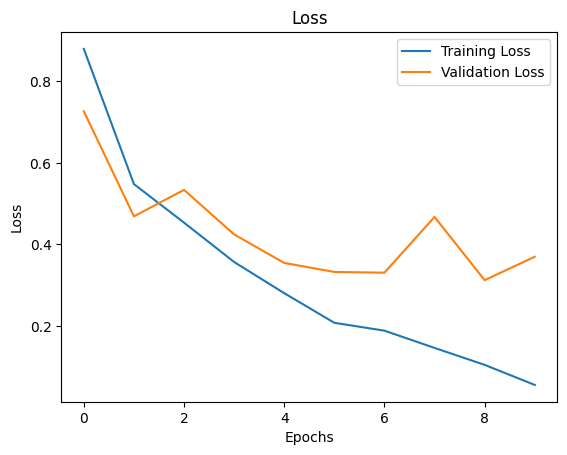

In [83]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()